<a href="https://www.kaggle.com/code/emiliomontelongoluna/nuclear-energy-datasets-analysis?scriptVersionId=217670569" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Nuclear Energy Analysis


**Project Overview**

This project will analyze nuclear energy's role in global electricity generation, its safety compared to other energy sources, uranium production and pricing trends, and the operational characteristics of reactors and power plants. The analysis aims to provide actionable insights into nuclear energy's potential in achieving sustainable energy goals.Check out the original dataset here: [Nuclear Energy Datasets](https://www.kaggle.com/datasets/alistairking/nuclear-energy-datasets/).**


# Objectives
1. Compare the safety of nuclear energy with other energy sources based on mortality rates.
2. Analyze trends in uranium purchase prices and production in the U.S.
3. Map global power plants and highlight nuclear facilities.
4. Explore global electricity generation trends with a focus on nuclear energy's share.
5. Investigate U.S. nuclear generating statistics and their evolution over time.
6. Examine reactor ownership and parent companies for market insights.

# Key Features of the Notebook
1. Time-series analysis of electricity generation and uranium pricing.
2. Geospatial visualization of global power plants.
3. Comparison of safety metrics across energy sources.
4. Predictive modeling for uranium prices or electricity generation.
5. Interactive visualizations for better storytelling.

### Importing Relevant Libraries

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Geospatial Analysis and Mapping
import folium
import geopandas as gpd


# Machine Learning and Statistical Modeling (if needed)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from prophet import Prophet

# General Utilities
import warnings
warnings.filterwarnings('ignore')

### Reading Files

Check out the README files and shortened file descriptions [here](https://www.kaggle.com/datasets/alistairking/nuclear-energy-datasets/) to understand what each means.

In [2]:
death_rate_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/rates_death_from_energy_production_per_twh.csv")
u_pur_price_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/uranium_purchase_price_us.csv")
reac_par_comp_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/reactors_parent_companies.csv")
g_pp_db_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/power_plant_database_global.csv", low_memory=False)
weg_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/world_electricity_generation.csv")
n_pp_u_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/number_of_plants_producing_uranium_in_us.csv")
us_ng_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/us_nuclear_generating_statistics_1971_2021.csv")
w_neg_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/world_nuclear_energy_generation.csv")
up_us_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/uranium_production_summary_us.csv")
neo_df = pd.read_csv("/kaggle/input/nuclear-energy-datasets/nuclear_energy_overview_eia.csv")

###  Analysis 1: Number of Plants Producing Uranium in the U.S.

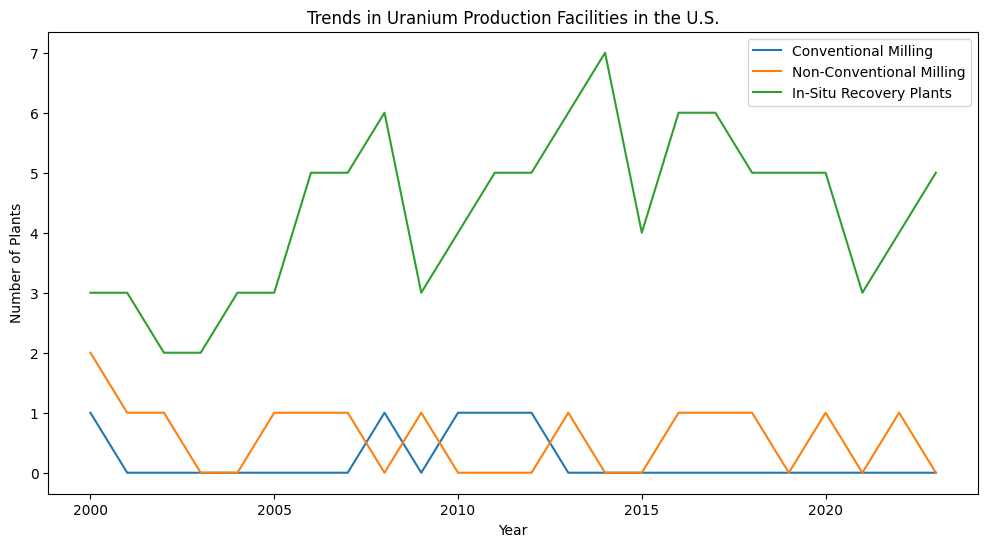

In [3]:
# Trend analysis for uranium plants
plt.figure(figsize=(12, 6))
sns.lineplot(data=n_pp_u_df, x='Year', y='Mills - conventional milling', label='Conventional Milling')
sns.lineplot(data=n_pp_u_df, x='Year', y='Mills - other operations', label='Non-Conventional Milling')
sns.lineplot(data=n_pp_u_df, x='Year', y='In-situ recovery plants', label='In-Situ Recovery Plants')
plt.title('Trends in Uranium Production Facilities in the U.S.')
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.legend()
plt.show()


In [4]:
us_ng_df.head()

,YEAR,TOTAL ELECTRICITY GENERATION,NUCLEAR GENERATION,NUCLEAR FUEL SHARE,CAPACITY FACTOR,SUMMER CAPACITY
0,1971,1615853616,38104545,2.4,48.2,9033
1,1972,1752978413,54091135,3.1,42.5,14481
2,1973,1864056631,83479463,4.5,53.5,22683
3,1974,1870319405,113975740,6.1,47.8,31867
4,1975,1920754569,172505075,9.0,55.9,37267


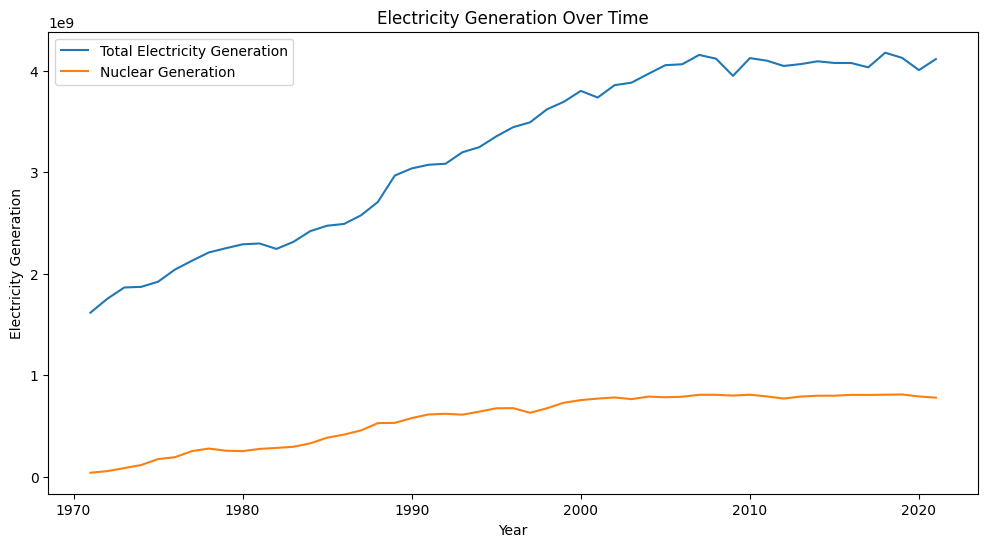

In [5]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(us_ng_df['YEAR'], us_ng_df['TOTAL ELECTRICITY GENERATION'], label='Total Electricity Generation')
plt.plot(us_ng_df['YEAR'], us_ng_df['NUCLEAR GENERATION'], label='Nuclear Generation')
plt.xlabel('Year')
plt.ylabel('Electricity Generation')
plt.title('Electricity Generation Over Time')
plt.legend()
plt.show()

In [6]:
# Prepare the data for predictive modeling
df_model = us_ng_df[['YEAR', 'NUCLEAR GENERATION']]
df_model.columns = ['ds', 'y']

# Create and train the Prophet model
model = Prophet()
model.fit(df_model)

# Make future predictions
future_years = pd.date_range(start='2022', end='2030', freq='YE')
future_df = pd.DataFrame({'ds': future_years})
forecast = model.predict(future_df)

19:45:21 - cmdstanpy - INFO - Chain [1] start processing
19:45:21 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1200x600 with 0 Axes>

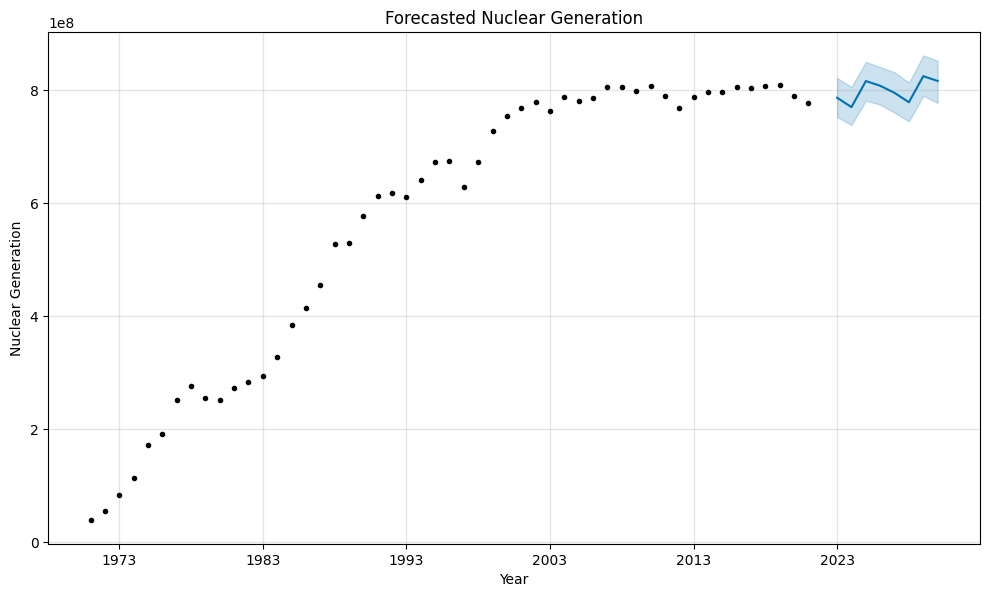

In [7]:
import warnings
warnings.filterwarnings("ignore")
# Visualize the forecasted values
plt.figure(figsize=(12, 6))
model.plot(forecast, xlabel='Year', ylabel='Nuclear Generation')
plt.title('Forecasted Nuclear Generation')
plt.show()

### Analysis 2: Death Rates from Energy Production

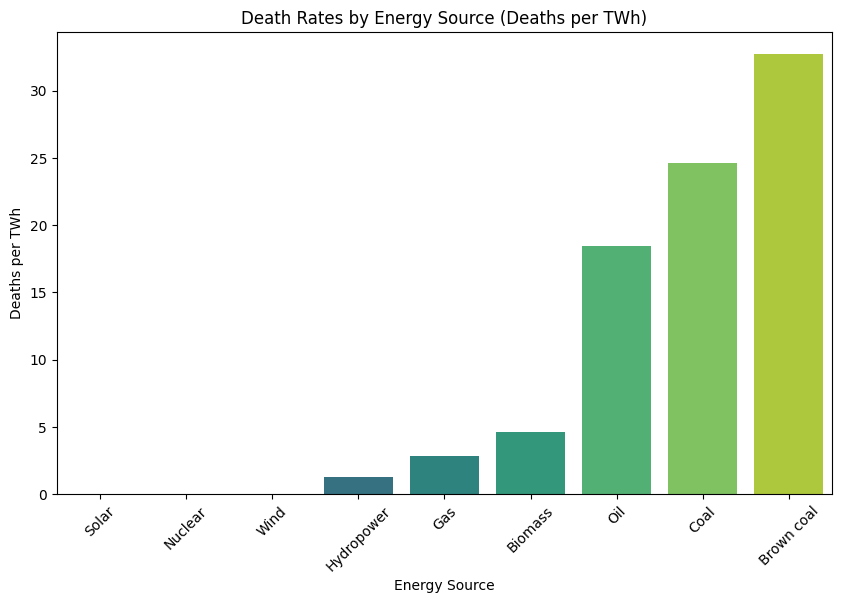

In [8]:
# Sort data by death rates
death_rate_df.sort_values(by='Deaths per TWh of electricity production', inplace=True)

# Bar plot for death rates
plt.figure(figsize=(10, 6))
sns.barplot(data=death_rate_df, x='Entity', y='Deaths per TWh of electricity production', palette='viridis')
plt.title('Death Rates by Energy Source (Deaths per TWh)')
plt.xlabel('Energy Source')
plt.ylabel('Deaths per TWh')
plt.xticks(rotation=45)
plt.show()


In [9]:
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud

# Create a custom colormap for the heatmap
colors = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b']
cmap = LinearSegmentedColormap.from_list('custom_blue', colors, N=256)

In [10]:
data = w_neg_df # simply reassinging name for ease of use

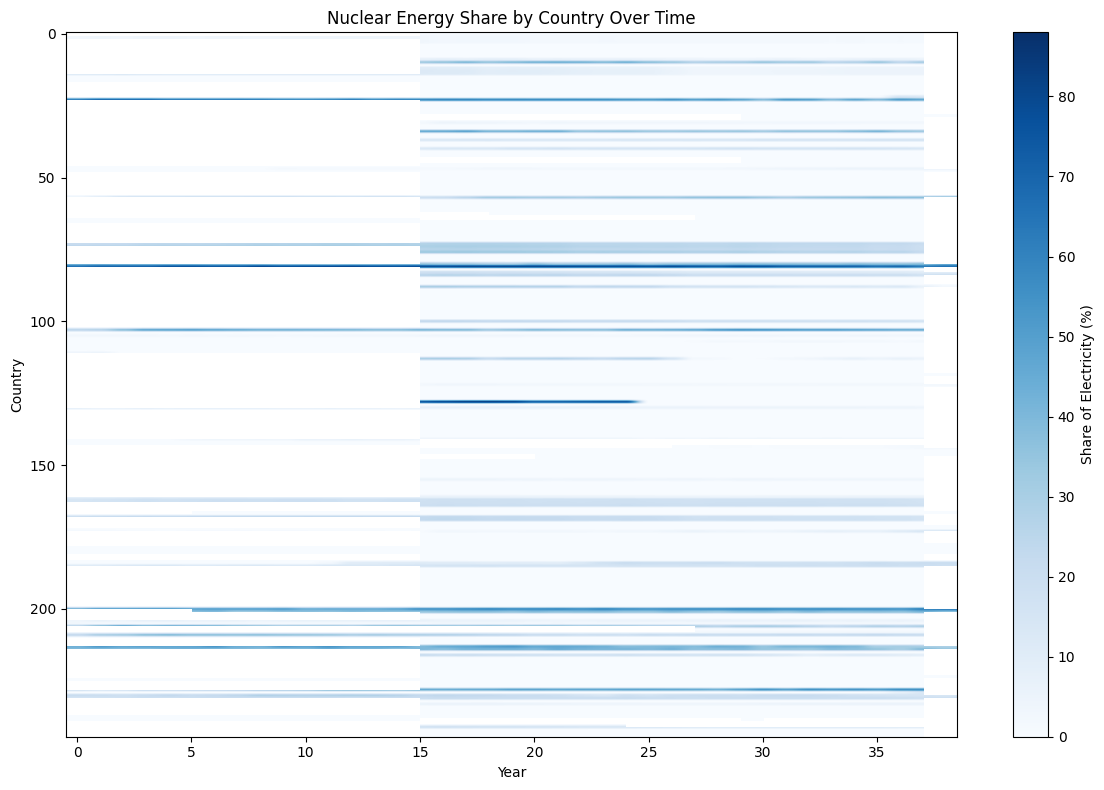

In [11]:
# Heatmap of nuclear energy share by country over time
plt.figure(figsize=(12, 8))
heatmap_data = data.pivot_table(index='Entity', columns='Year', values='share_of_electricity_pct', aggfunc='mean')
plt.imshow(heatmap_data, cmap=cmap, aspect='auto')
plt.colorbar(label='Share of Electricity (%)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Nuclear Energy Share by Country Over Time')
plt.tight_layout()
plt.savefig('nuclear_energy_share_heatmap.png')
plt.show()

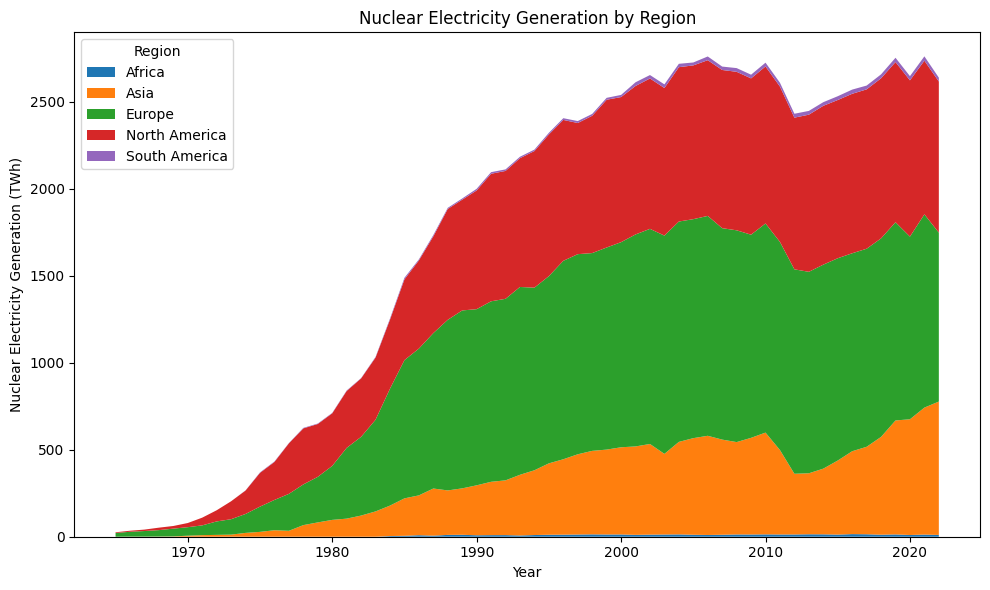

In [12]:
# Stacked area chart of nuclear electricity generation by region
regions = ['Africa', 'Asia', 'Europe', 'North America', 'South America']
data_regions = data[data['Entity'].isin(regions)]
data_regions = data_regions.pivot_table(index='Year', columns='Entity', values='electricity_from_nuclear_twh', aggfunc='sum')

plt.figure(figsize=(10, 6))
plt.stackplot(data_regions.index, data_regions.T, labels=regions)
plt.xlabel('Year')
plt.ylabel('Nuclear Electricity Generation (TWh)')
plt.title('Nuclear Electricity Generation by Region')
plt.legend(title='Region', loc='upper left')
plt.tight_layout()
plt.savefig('nuclear_electricity_generation_stacked_area.png')
plt.show()

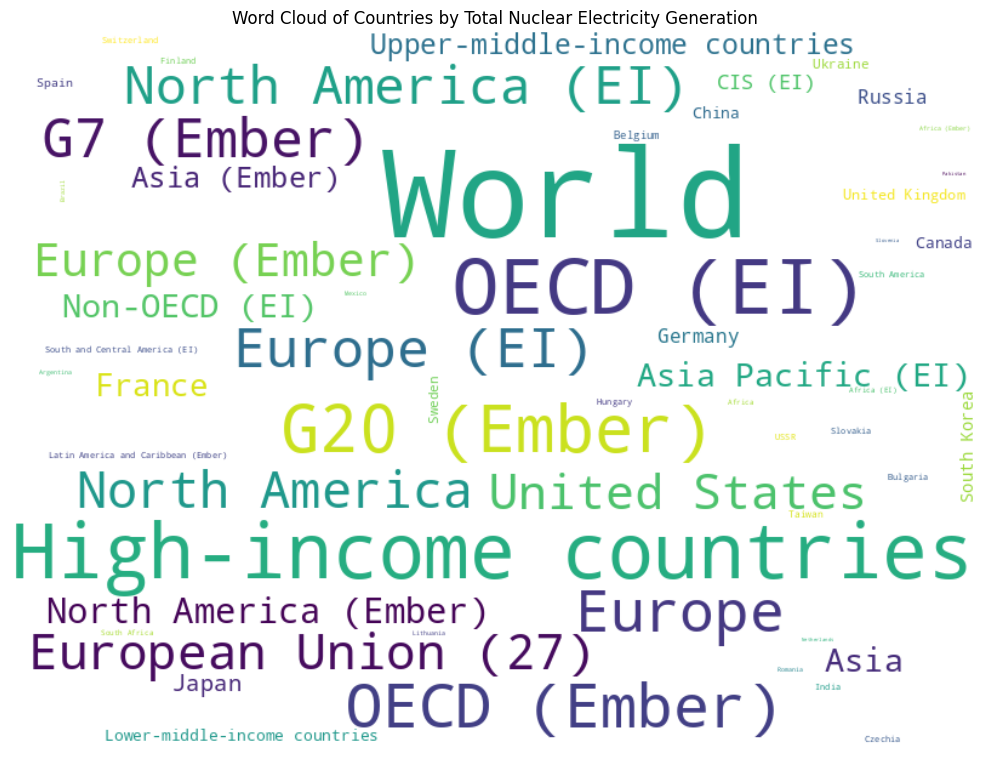

In [13]:
# Word cloud of countries based on their total nuclear electricity generation
wordcloud_data = data.groupby('Entity')['electricity_from_nuclear_twh'].sum().sort_values(ascending=False)
wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Countries by Total Nuclear Electricity Generation')
plt.tight_layout()
plt.savefig('nuclear_electricity_generation_wordcloud.png')
plt.show()

### Analysis 3: Reactor Parent Companies

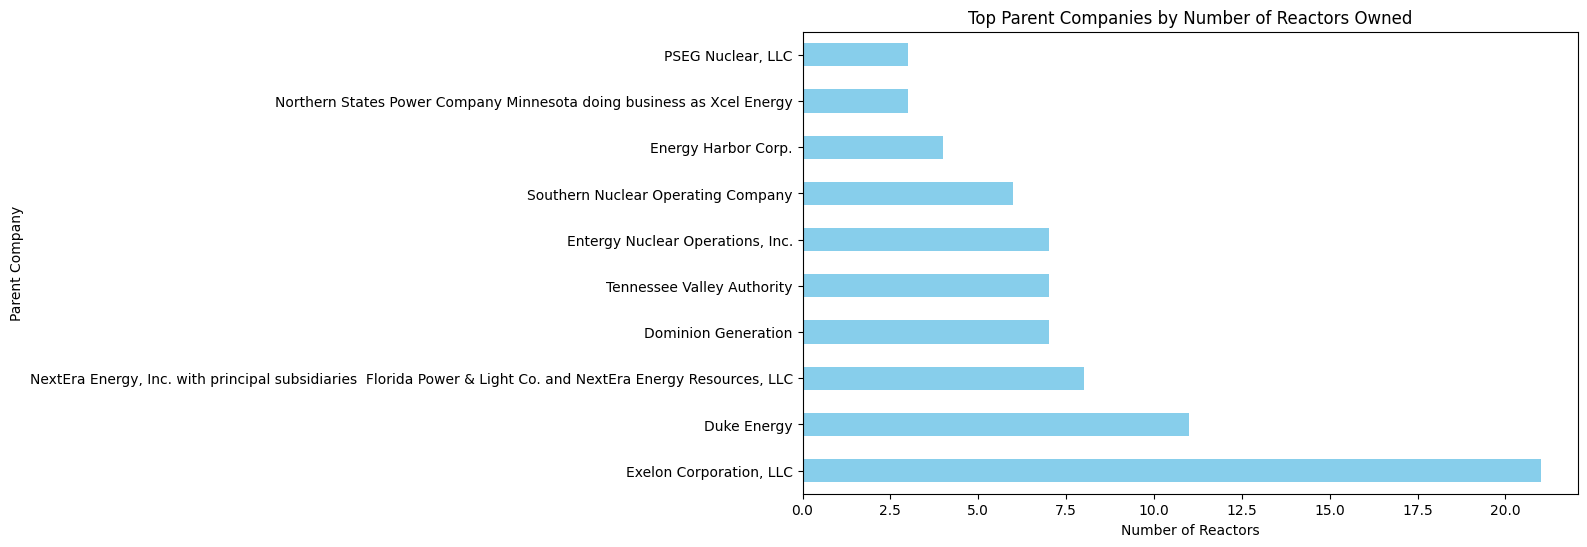

In [14]:
# Count reactors by parent company
parent_company_counts = reac_par_comp_df['Parent Company Utility Name'].value_counts()

# Plot top parent companies
parent_company_counts.head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top Parent Companies by Number of Reactors Owned')
plt.xlabel('Number of Reactors')
plt.ylabel('Parent Company')
plt.show()


### Analysis 4: Uranium Production Summary

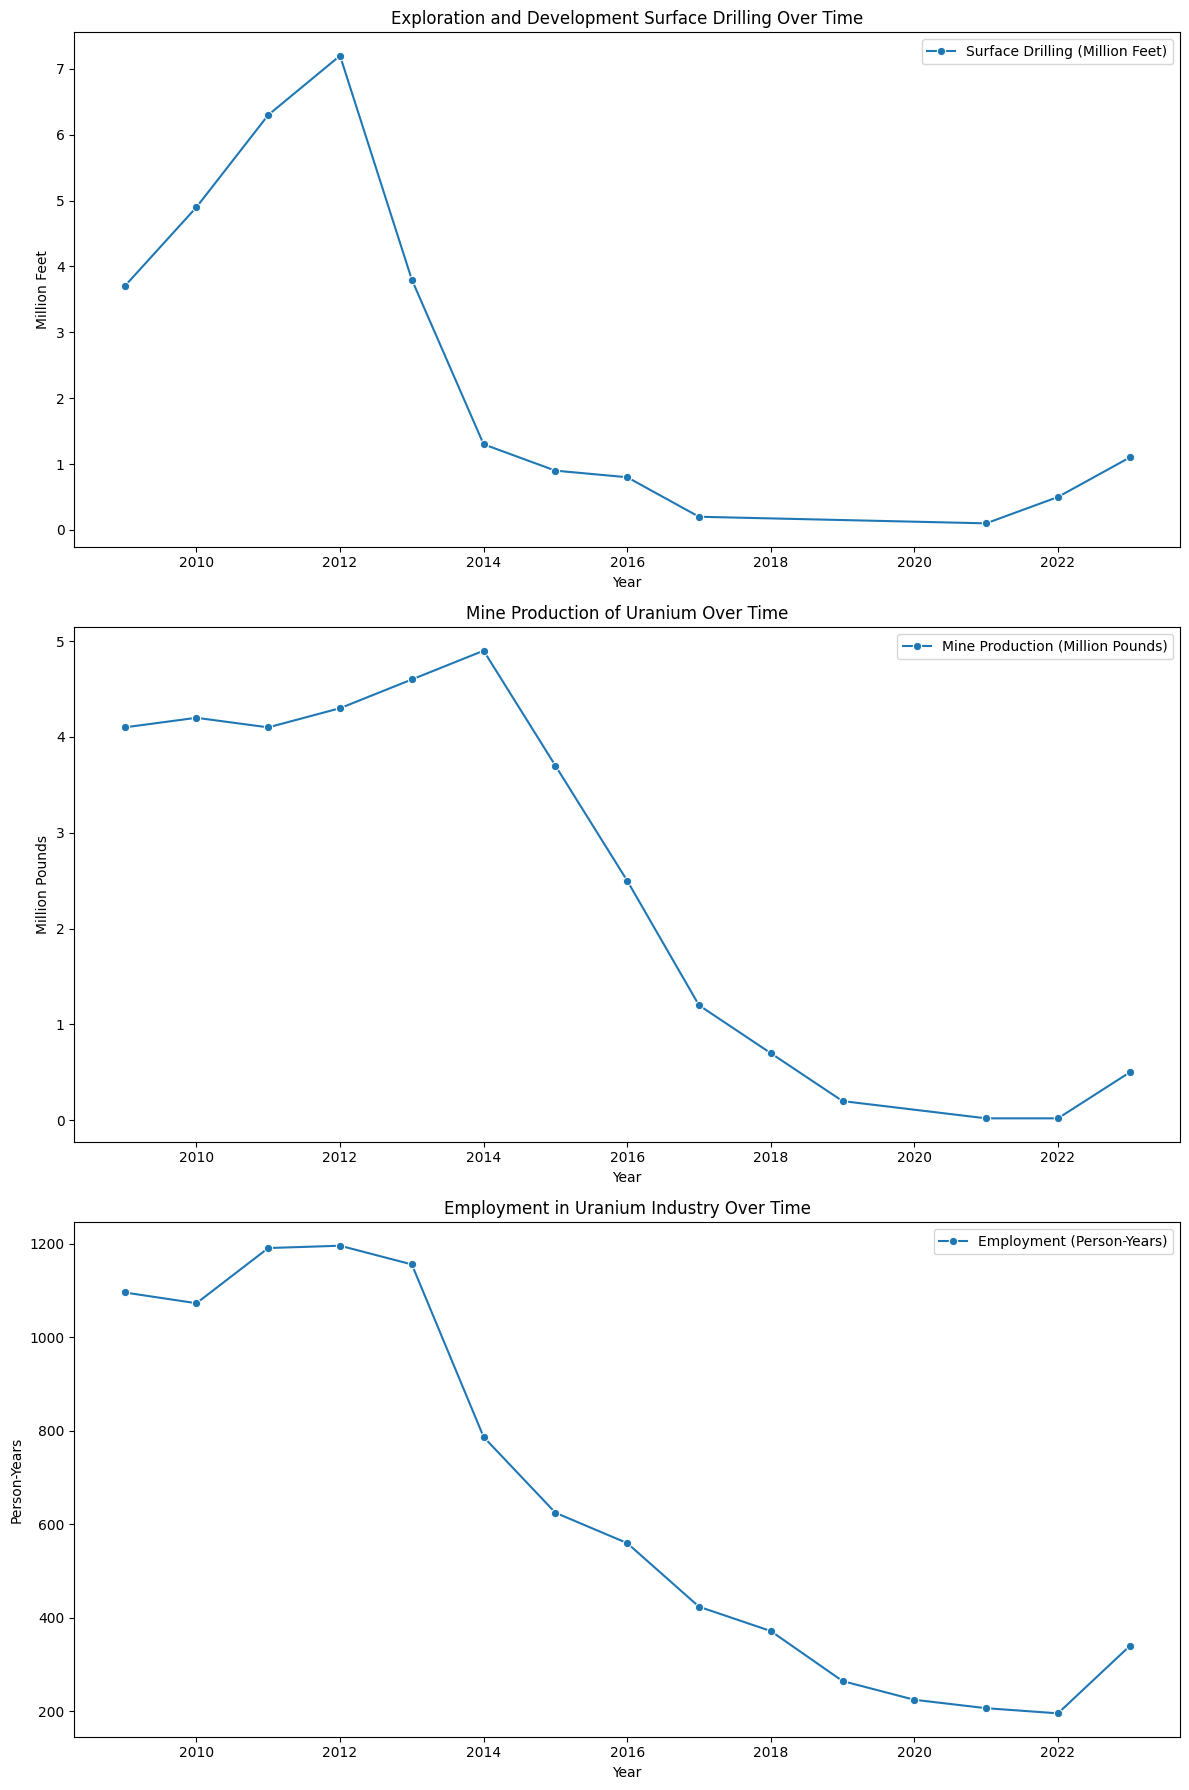

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Clean up column names (remove whitespace and fix typos)
up_us_df.columns = up_us_df.columns.str.strip()
up_us_df.rename(columns={
    'Exploration and development surface drililng': 'Exploration and development surface drilling'
}, inplace=True)

# Convert 'Employment' column to numeric (remove commas if present)
up_us_df['Employment'] = up_us_df['Employment'].replace(',', '', regex=True).astype(float)

# Replace 'W' (withheld data) with NaN for proper handling
up_us_df.replace('W', None, inplace=True)

# Convert relevant columns to numeric
numeric_columns = [
    'Exploration and development surface drilling',
    'Mine production of uranium',
    'Employment'
]
up_us_df[numeric_columns] = up_us_df[numeric_columns].astype(float)

# Plot uranium exploration trends
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Exploration and development surface drilling over time
sns.lineplot(
    data=up_us_df,
    x='Year',
    y='Exploration and development surface drilling',
    ax=ax[0],
    marker='o',
    label='Surface Drilling (Million Feet)'
)
ax[0].set_title('Exploration and Development Surface Drilling Over Time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Million Feet')

# Mine production of uranium over time
sns.lineplot(
    data=up_us_df,
    x='Year',
    y='Mine production of uranium',
    ax=ax[1],
    marker='o',
    label='Mine Production (Million Pounds)'
)
ax[1].set_title('Mine Production of Uranium Over Time')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Million Pounds')

# Employment in uranium industry over time
sns.lineplot(
    data=up_us_df,
    x='Year',
    y='Employment',
    ax=ax[2],
    marker='o',
    label='Employment (Person-Years)'
)
ax[2].set_title('Employment in Uranium Industry Over Time')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Person-Years')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


Index(['Year', 'Exploration and development surface drilling',
       'Exploration and development drilling  expenditures',
       'Mine production of uranium', 'Uranium concentrate production',
       'Uranium concentrate shipments', 'Employment'],
      dtype='object')


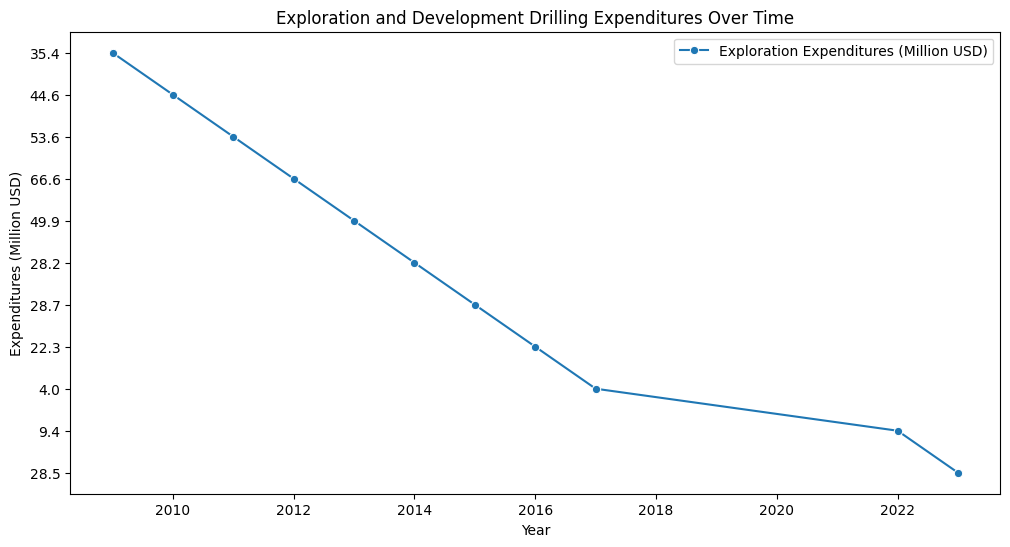

In [16]:
print(up_us_df.columns)
up_us_df.columns = up_us_df.columns.str.strip()
up_us_df.rename(columns={
    'Exploration and development surface drililng': 'Exploration and development surface drilling',
    'Exploration and development drilling  expenditures': 'Exploration and development drilling expenditures'
}, inplace=True)
up_us_df.replace('W', pd.NA, inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot exploration expenditures over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=up_us_df,
    x='Year',
    y='Exploration and development drilling expenditures',
    marker='o',
    label='Exploration Expenditures (Million USD)'
)
plt.title('Exploration and Development Drilling Expenditures Over Time')
plt.xlabel('Year')
plt.ylabel('Expenditures (Million USD)')
plt.legend()
plt.show()

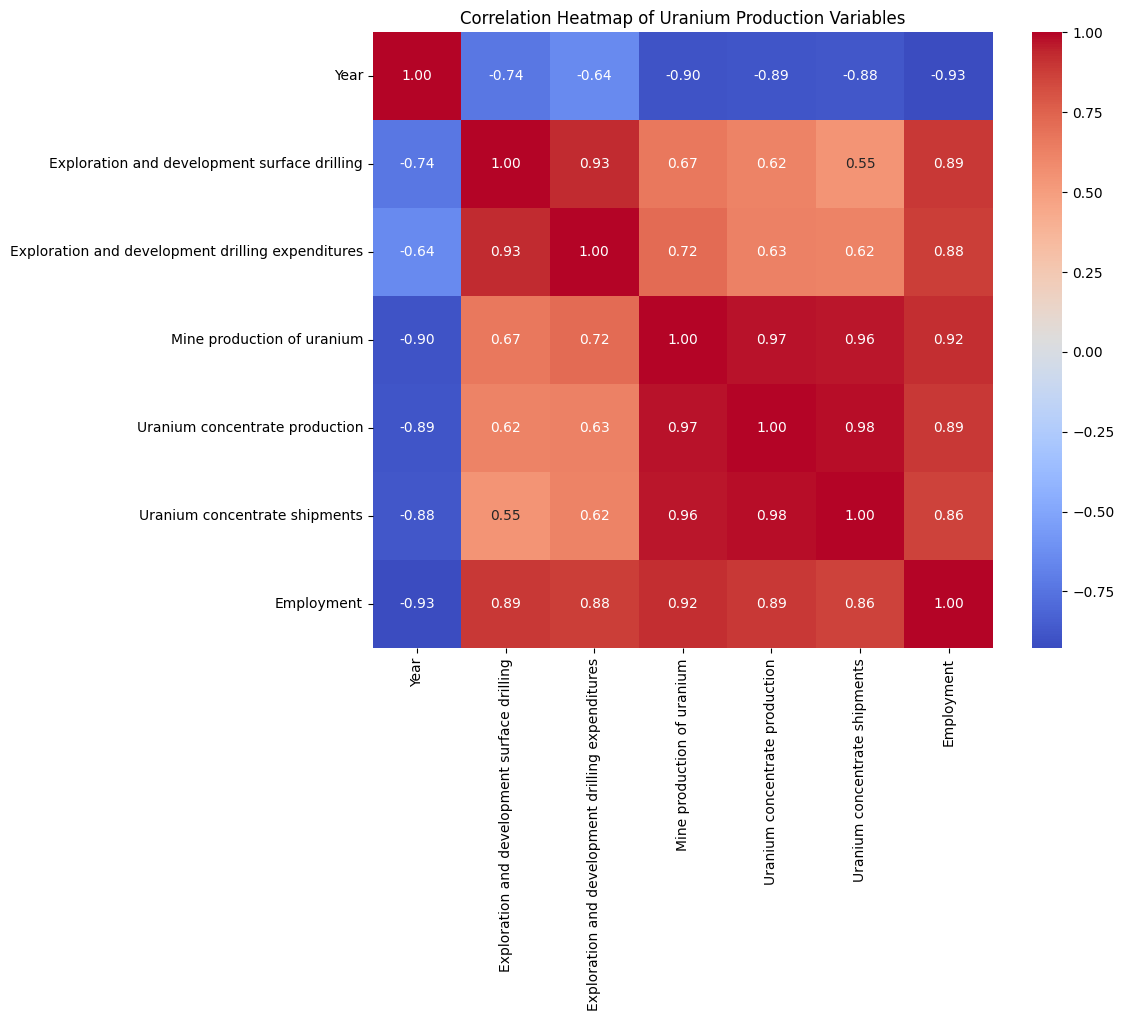

In [17]:
# Correlation heatmap
correlation = up_us_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Uranium Production Variables')
plt.show()

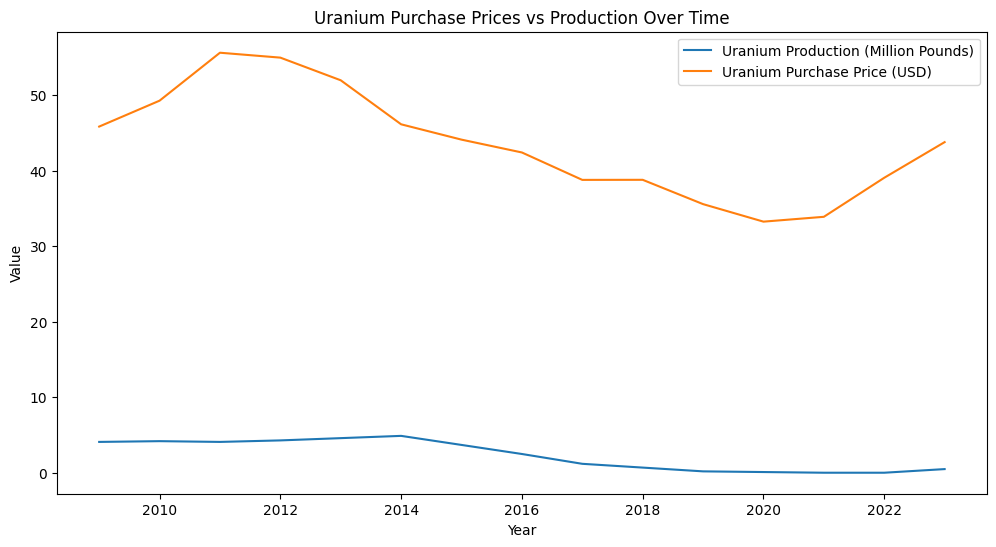

In [18]:


# Load datasets
uranium_data = pd.read_csv("/kaggle/input/nuclear-energy-datasets/uranium_production_summary_us.csv")
uranium_prices = pd.read_csv("/kaggle/input/nuclear-energy-datasets/uranium_purchase_price_us.csv")

# Clean and prepare data
uranium_data['Mine production of uranium'] = uranium_data['Mine production of uranium'].replace('W', None).astype(float)
uranium_prices['Total purchased'] = uranium_prices['Total purchased'].replace('W', None).astype(float)

# Merge datasets on 'Year'
merged_data = pd.merge(
    uranium_data[['Year', 'Mine production of uranium']],
    uranium_prices[['Delivery year', 'Total purchased']].rename(columns={'Delivery year': 'Year'}),
    on='Year',
    how='inner'
)

# Plot trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Year', y='Mine production of uranium', label='Uranium Production (Million Pounds)')
sns.lineplot(data=merged_data, x='Year', y='Total purchased', label='Uranium Purchase Price (USD)')
plt.title('Uranium Purchase Prices vs Production Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


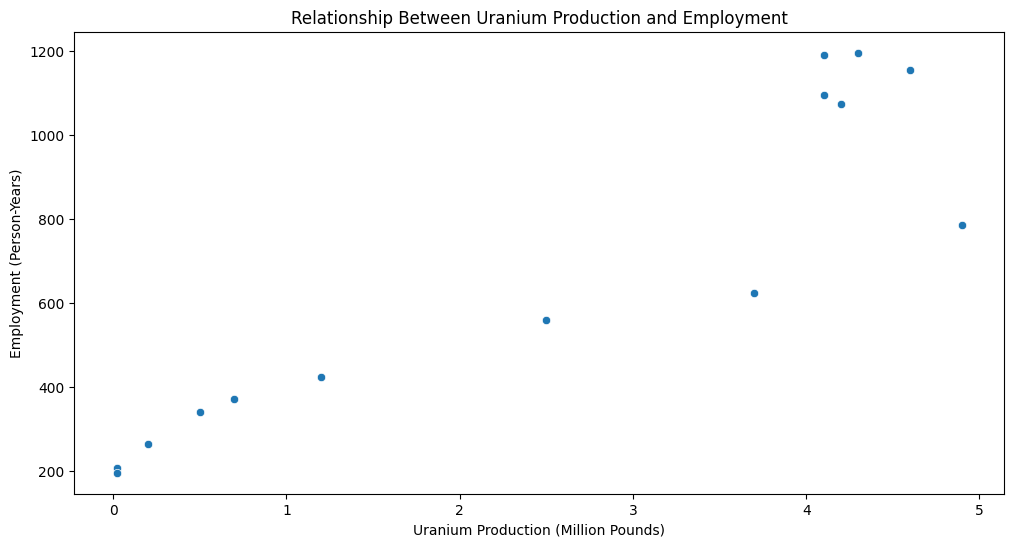

In [19]:
# Load dataset
uranium_data = pd.read_csv("/kaggle/input/nuclear-energy-datasets/uranium_production_summary_us.csv")

# Clean and prepare data
uranium_data['Mine production of uranium'] = uranium_data['Mine production of uranium'].replace('W', None).astype(float)
uranium_data['Employment'] = uranium_data['Employment'].replace(',', '', regex=True).replace('W', None).astype(float)

# Plot relationship between uranium production and employment
plt.figure(figsize=(12, 6))
sns.scatterplot(data=uranium_data, x='Mine production of uranium', y='Employment')
plt.title('Relationship Between Uranium Production and Employment')
plt.xlabel('Uranium Production (Million Pounds)')
plt.ylabel('Employment (Person-Years)')
plt.show()


## Credits & Future Work
Please refer to the dataset description found [here](https://www.kaggle.com/datasets/alistairking/nuclear-energy-datasets/) for the full list of credits. 

If you have any suggestions for future work or collaborations, please do not hesitate to reach out!